In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print('train data: images: ', x_img_train.shape, 'labels: ', y_label_train.shape)
print(' test data: images: ', x_img_test.shape, 'labels: ', y_label_test.shape)

train data: images:  (50000, 32, 32, 3) labels:  (50000, 1)
 test data: images:  (10000, 32, 32, 3) labels:  (10000, 1)


In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_Test_OneHot = np_utils.to_categorical(y_label_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
model = Sequential()

W0709 09:15:00.619920  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [8]:
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 padding = 'same',
                 input_shape = (x_img_train.shape[1], x_img_train.shape[2], x_img_train.shape[3]),
                 activation = 'relu'))

W0709 09:15:00.657365  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 09:15:00.666949  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.add(Dropout(0.25))

W0709 09:15:00.688953  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0709 09:15:00.730868  3344 deprecation.py:506] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.add(MaxPooling2D(pool_size = (2, 2)))

W0709 09:15:00.746381  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [11]:
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))

In [12]:
model.add(Dropout(0.25))

In [13]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [14]:
model.add(Flatten())
model.add(Dropout(0.25))

In [15]:
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.25))

In [16]:
model.add(Dense(10, activation = 'softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [18]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

W0709 09:15:00.843138  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 09:15:00.857128  3344 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
train_history = model.fit(x = x_img_train_normalize, 
                          y = y_label_train_OneHot, 
                          validation_split = 0.2, 
                          epochs = 10, batch_size = 128, verbose = 2)

W0709 09:15:00.930056  3344 deprecation.py:323] From C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 40000 samples, validate on 10000 samples
Epoch 1/10
 - 38s - loss: 1.5027 - acc: 0.4585 - val_loss: 1.2752 - val_acc: 0.5816
Epoch 2/10
 - 38s - loss: 1.1389 - acc: 0.5963 - val_loss: 1.1071 - val_acc: 0.6397
Epoch 3/10
 - 38s - loss: 0.9833 - acc: 0.6562 - val_loss: 0.9976 - val_acc: 0.6634
Epoch 4/10
 - 38s - loss: 0.8762 - acc: 0.6907 - val_loss: 0.9465 - val_acc: 0.6912
Epoch 5/10
 - 38s - loss: 0.7867 - acc: 0.7231 - val_loss: 0.8767 - val_acc: 0.7105
Epoch 6/10
 - 38s - loss: 0.7021 - acc: 0.7539 - val_loss: 0.8431 - val_acc: 0.7218
Epoch 7/10
 - 38s - loss: 0.6245 - acc: 0.7810 - val_loss: 0.8215 - val_acc: 0.7253
Epoch 8/10
 - 38s - loss: 0.5635 - acc: 0.8026 - val_loss: 0.7770 - val_acc: 0.7399
Epoch 9/10
 - 38s - loss: 0.4860 - acc: 0.8310 - val_loss: 0.8398 - val_acc: 0.7090
Epoch 10/10
 - 38s - loss: 0.4390 - acc: 0.8470 - val_loss: 0.7503 - val_acc: 0.7420


In [20]:
import matplotlib.pyplot as plt
def show_train_histoy(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()

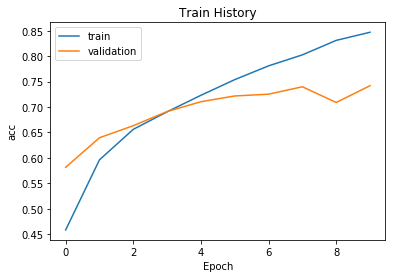

In [21]:
show_train_histoy(train_history, 'acc', 'val_acc')

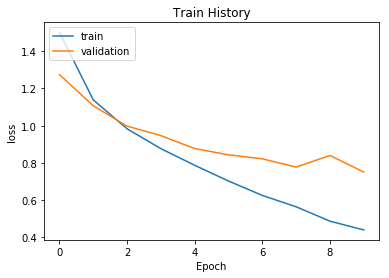

In [22]:
show_train_histoy(train_history, 'loss', 'val_loss')

In [24]:
scores = model.evaluate(x_img_test_normalize, y_label_Test_OneHot, verbose = 0)
scores[1]

0.7382

In [25]:
prediction = model.predict_classes(x_img_test_normalize)

In [26]:
prediction[:10]

array([5, 8, 0, 8, 6, 6, 1, 6, 3, 1], dtype=int64)

In [33]:
label_dict = {0: 'airplane', 
              1: 'automobile', 
              2: 'bird', 3: 'cat', 
              4: 'deer', 5: 'dog', 
              6: 'frog', 7: 'horse', 
              8: 'ship', 9: 'truck'}

In [44]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
    fig = plt.gcf()
    fig.set_size_inches(14, 14)
    if num > 25: num = 25
    for i in range(num):
        ax = plt.subplot(5, 5, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ', ' + str(label_dict[labels[idx][0]])
        if len(prediction) > 0:
            title += ', predict= ' + label_dict[prediction[idx]]
            
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

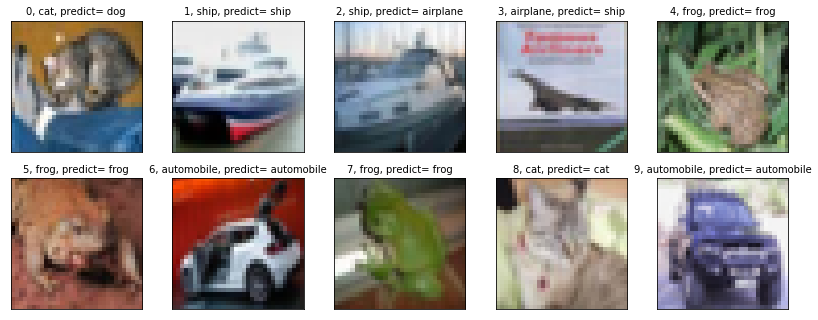

In [45]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [46]:
Predicted_Probability = model.predict(x_img_test_normalize)

<hr>
建立函式顯示預測機率
<hr>

In [51]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label: ', label_dict[y[i][0]],
          'predict: ', label_dict[prediction[i]])
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + '_Probability: %1.9f'%(Predicted_Probability[i][j]))

label:  cat predict:  dog


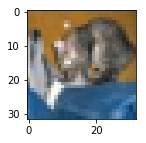

airplane_Probability: 0.017566169
automobile_Probability: 0.004006295
bird_Probability: 0.014774265
cat_Probability: 0.393225908
deer_Probability: 0.018606491
dog_Probability: 0.489019245
frog_Probability: 0.028512945
horse_Probability: 0.011681048
ship_Probability: 0.020895222
truck_Probability: 0.001712505


In [52]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 0)

label:  airplane predict:  ship


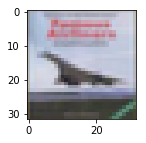

airplane_Probability: 0.421618998
automobile_Probability: 0.001144977
bird_Probability: 0.007981875
cat_Probability: 0.000792679
deer_Probability: 0.009371418
dog_Probability: 0.000028041
frog_Probability: 0.000111861
horse_Probability: 0.000127502
ship_Probability: 0.558185816
truck_Probability: 0.000636837


In [53]:
show_Predicted_Probability(y_label_test, prediction, x_img_test, Predicted_Probability, 3)

<hr>
使用crosstab需確認參數皆為一維
<hr>

In [58]:
prediction.shape

(10000,)

In [55]:
y_label_test.shape

(10000, 1)

<hr>
reshape(-1)可轉換成一維陣列
<hr>

In [56]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [57]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1), prediction, rownames = ['label'], colnames = ['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,765,7,34,18,37,12,11,13,62,41
1,13,815,11,14,2,10,17,6,19,93
2,52,4,562,51,115,83,85,28,10,10
3,16,6,55,492,81,203,88,38,10,11
4,17,3,45,44,749,36,56,39,8,3
5,9,1,37,132,55,671,34,50,4,7
6,2,1,25,47,21,22,871,4,4,3
7,10,1,16,24,67,69,6,799,3,5
8,48,25,14,17,14,10,11,3,831,27
